In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

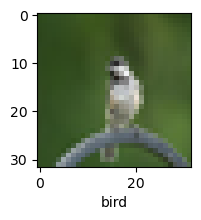

In [17]:
plot_sample(X_train, y_train, 54)

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0


C:\Users\bishn\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


C:\Users\bishn\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 299s 377ms/step - accuracy: 0.2872 - loss: 2.2055 - val_accuracy: 0.3794 - val_loss: 1.9540 - learning_rate: 0.0010
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 279s 357ms/step - accuracy: 0.4694 - loss: 1.4734 - val_accuracy: 0.5005 - val_loss: 1.4265 - learning_rate: 0.0010
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 279s 357ms/step - accuracy: 0.5613 - loss: 1.2294 - val_accuracy: 0.5984 - val_loss: 1.2859 - learning_rate: 0.0010
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 278s 356ms/step - accuracy: 0.6152 - loss: 1.0867 - val_accuracy: 0.6916 - val_loss: 0.9120 - learning_rate: 0.0010
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 278s 356ms/step - accuracy: 0.6569 - loss: 0.9836 - val_accuracy: 0.7091 - val_loss: 0.8781 - learning_rate: 0.0010
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 278s 356ms/step - accuracy: 0.6831 - loss: 0.9197 - val_accuracy: 0.6746 - val_loss: 1.0520 - learning_rate: 0.0010
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 280s 358ms/step - accuracy: 0.7058 

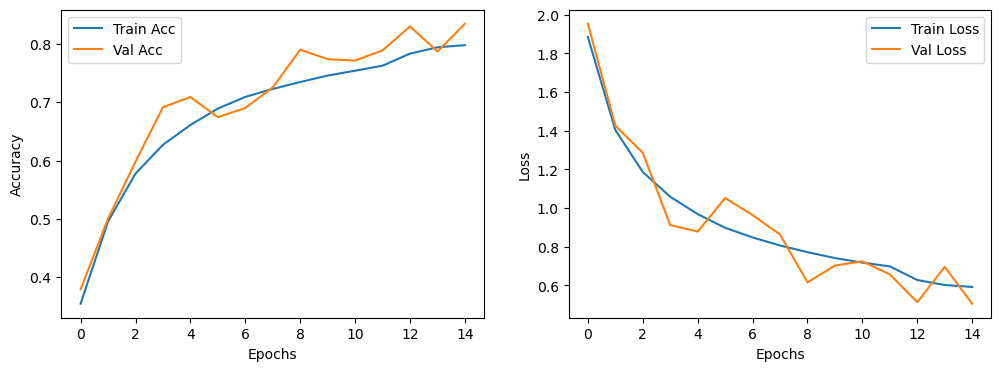

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values (0 to 1)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
    horizontal_flip=True, zoom_range=0.2, shear_range=0.2
)
datagen.fit(x_train)

# Define CNN Model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile Model
optimizer = AdamW(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=15, callbacks=[lr_schedule, early_stopping])

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_pred[5]

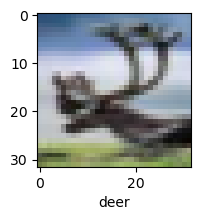

In [25]:

y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 40)


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

In [ ]:
classes[y_classes[40]]

In [ ]:
# Load and preprocess the image
image_path = 'images (1).jpeg'  # Ensure this path is correct
image = cv2.imread(image_path)

# Check if image was loaded
if image is None:
    print(f"Error: Could not read image at {image_path}")
else:
    # Convert to grayscale (optional, depending on use case)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection (example using Canny)
    edges = cv2.Canny(gray_image, 100, 200)

    # Detect objects using contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

    # Display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Save output image (Optional)
    cv2.imwrite('output.jpg', image)
